# Stock Price Prediction of Microsoft

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


# Reading data using parse date
As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [2]:

df_final = pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
df_final.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.863243,20382700


In [4]:

df_final.shape

(1426, 6)

In [5]:
df_final.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1.426000e+03
mean,169.561353,171.243268,167.753464,169.588822,165.923293,2.890647e+07
std,82.510456,83.402749,81.533050,82.509972,83.539829,1.262903e+07
min,62.189999,62.660000,61.950001,62.299999,57.549179,7.425600e+06
25%,98.414999,99.912503,97.302502,98.444999,93.971957,2.075820e+07
50%,142.135002,144.700005,139.805001,141.455002,137.402313,2.568230e+07
75%,243.832501,245.525005,241.487496,243.752502,240.720517,3.318965e+07
max,344.619995,349.670013,342.200012,343.109985,340.882782,1.112421e+08


In [6]:
df_final.isnull().values.any()

False

<AxesSubplot:xlabel='Date'>

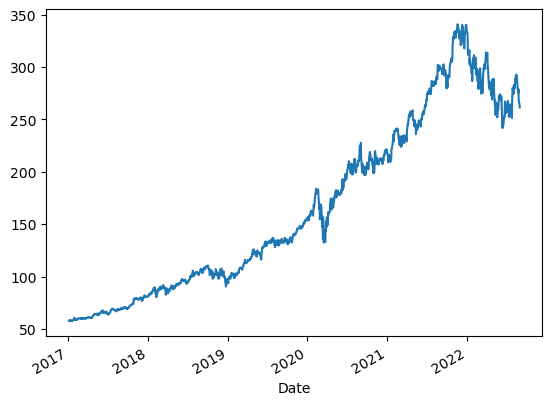

In [8]:
df_final['Adj_Close'].plot()

# Correlation Analysis

In [10]:
X=df_final.drop(['Adj_Close'],axis=1)
X=X.drop(['Close'],axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

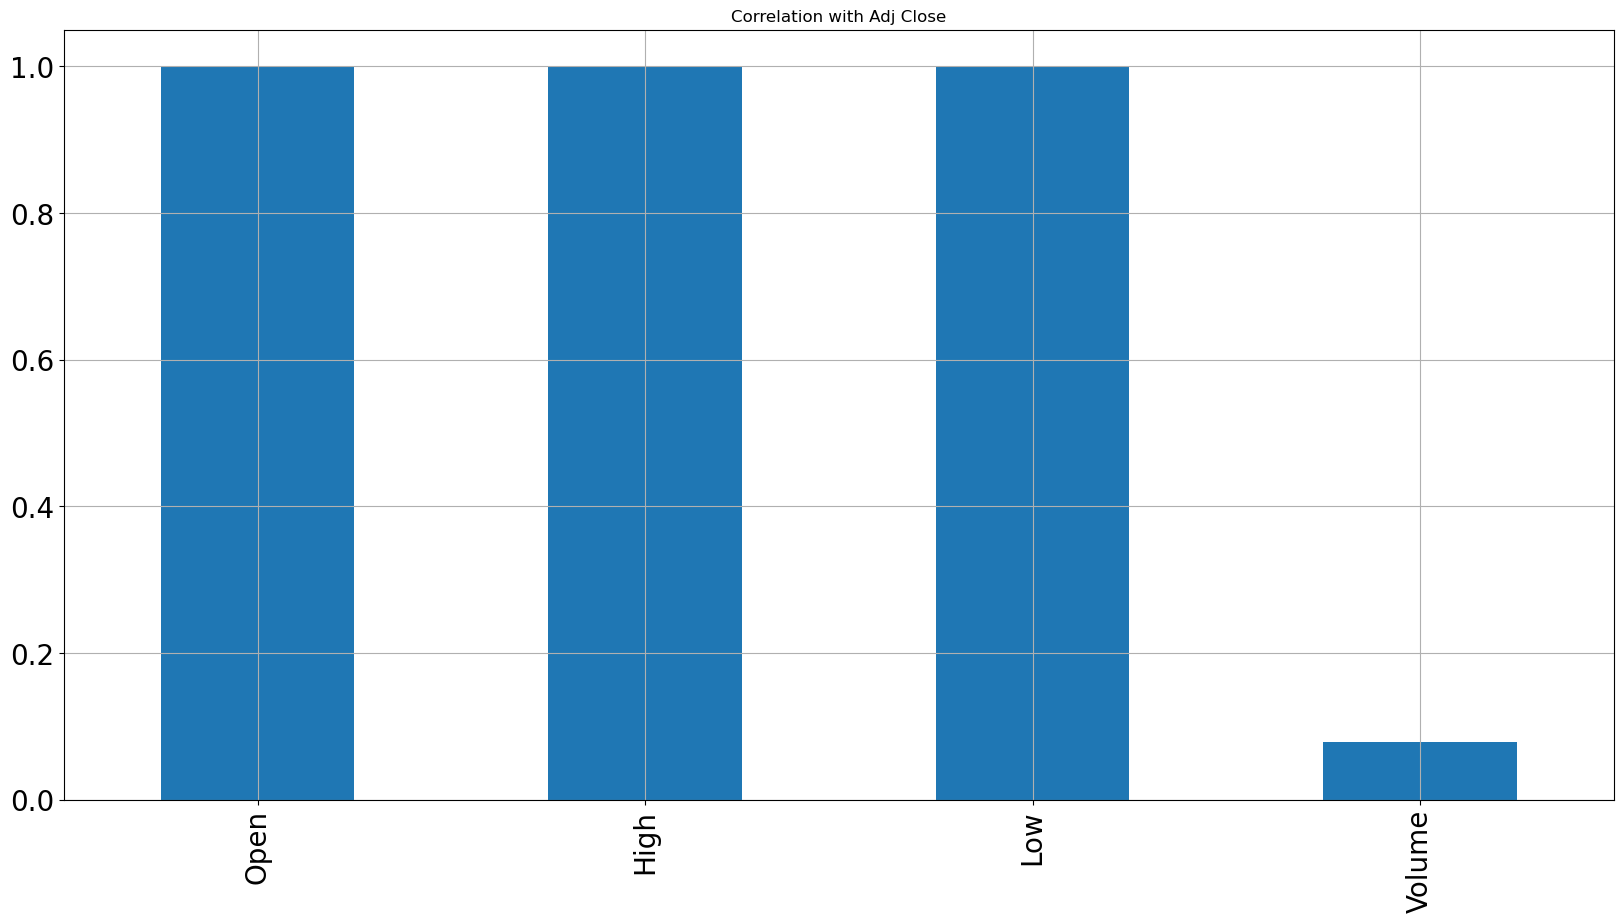

In [11]:
X.corrwith(df_final['Adj_Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [12]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj_Close'])
display(test.head())

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.863243,20382700


In [13]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Normalizing the data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2017-01-03,0.002124,0.000627,0.000642,0.127807
2017-01-04,0.001027,0.000314,0.000607,0.134029
2017-01-05,0.000000,0.000000,0.000285,0.168089
2017-01-06,0.000389,0.001707,0.000321,0.120379
2017-01-09,0.002018,0.001463,0.002105,0.124808


In [15]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2017-01-03,0.002124,0.000627,0.000642,0.127807
2017-01-04,0.001027,0.000314,0.000607,0.134029
2017-01-05,0.000000,0.000000,0.000285,0.168089
2017-01-06,0.000389,0.001707,0.000321,0.120379
2017-01-09,0.002018,0.001463,0.002105,0.124808


Shape of features :  (1426, 4)
Shape of target :  (1426, 1)


,Open,High,Low,Volume
Date,,,,
2022-08-24,0.754948,0.747605,0.760607,0.103176
2022-08-25,0.761746,0.753841,0.758501,0.088211
2022-08-26,0.767942,0.758440,0.735165,0.193677
2022-08-29,0.721099,0.713355,0.720428,0.124382
2022-08-30,0.724002,0.712135,0.709045,0.147775


,Adj_Close
Date,
2022-08-24,278.850006
2022-08-25,268.089996
2022-08-26,265.230011
2022-08-29,262.970001
2022-08-30,261.470001



 -----After process------ 

Shape of features :  (1336, 4)
Shape of target :  (1336, 1)


,Adj_Close
Date,
2022-04-18,284.034149
2022-04-19,285.089447
2022-04-20,279.564056
2022-04-21,272.814178
2022-04-22,279.474487


# Train test Split using Timeseriessplit

In [16]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [17]:

X_train.shape

(1215, 4)

In [18]:
X_test.shape

(121, 4)

In [19]:
y_train.shape

(1215,)

In [20]:
y_test.shape

(121,)

In [21]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Benchmark Model

RMSE:  8.080067466493164
R2 score:  0.5848302063318935


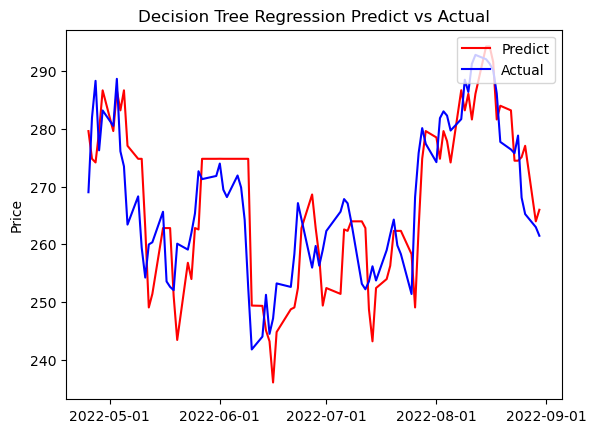

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

# Process the data for LSTM

In [23]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model building : LSTM

In [49]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
# model_lstm.add(LSTM(16))
model_lstm.add(Dense(50))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
152/152 [==============================] - 4s 5ms/step - loss: 20058.6836
Epoch 2/200
152/152 [==============================] - 1s 4ms/step - loss: 3827.2666
Epoch 3/200
152/152 [==============================] - 1s 5ms/step - loss: 165.2802
Epoch 4/200
152/152 [==============================] - 1s 9ms/step - loss: 139.3297
Epoch 5/200
152/152 [==============================] - 1s 7ms/step - loss: 124.7874
Epoch 6/200
152/152 [==============================] - 1s 7ms/step - loss: 111.5226
Epoch 7/200
152/152 [==============================] - 1s 8ms/step - loss: 99.4155
Epoch 8/200
152/152 [==============================] - 1s 7ms/step - loss: 88.3714
Epoch 9/200
152/152 [==============================] - 1s 7ms/step - loss: 78.4661
Epoch 10/200
152/152 [==============================] - 1s 8ms/step - loss: 69.7399
Epoch 11/200
152/152 [==============================] - 1s 6ms/step - loss: 62.2209
Epoch 12/200
152/152 [==============================] - 1s 6ms/step - loss: 

# Evaluation of Model

In [50]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


38/38 [==============================] - 0s 4ms/step
The R2 score on the Train set is:	0.995
The R2 score on the Test set is:	0.859


## Predictions made by LSTM

In [51]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

121/121 [==============================] - 1s 5ms/step - loss: 54.2766


In [52]:
print('LSTM: %f'%score_lstm)

LSTM: 54.276638


In [53]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

4/4 [==============================] - 0s 6ms/step


# LSTM's Prediction Visual

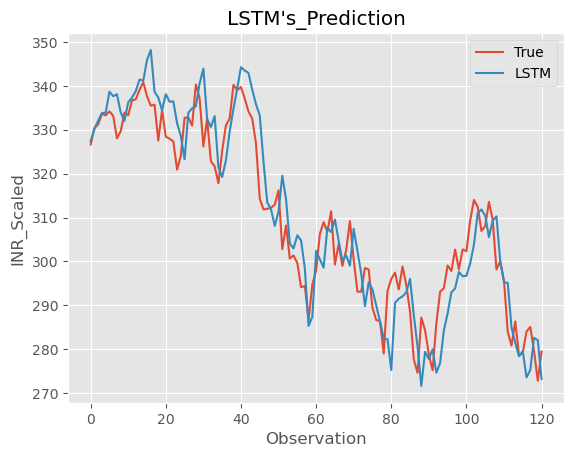

In [55]:
plt.style.use('ggplot')
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


# Converting Prediction data
In this step I have made the prediction of test data and will convert the dataframe to csv so that we can see the price difference between actual and predicted price.

In [30]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')

# Conclusion

It is impossible to  get a model that can 99% predict the price without any error, there are too many factors can affect the
stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.


Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure. As exact 